<a href="https://colab.research.google.com/github/jbmmbj/m494/blob/main/FrEIA_Quickstart_exploration4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install FrEIA

  Preparing metadata (setup.py) ... done
  Created wheel for FrEIA: filename=FrEIA-0.2-py3-none-any.whl size=42759 sha256=be23d860b75b32bab2de1443ecd68ed52492c407f94620cbcea934e684620abf
  Stored in directory: /root/.cache/pip/wheels/81/a8/e2/d532a76f72108ac4a340cbe3f86b4f591abfdbd75209a5badb
Successfully built FrEIA


In [40]:

# standard imports
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from sklearn.datasets import make_moons

# FrEIA imports
import FrEIA.framework as Ff
import FrEIA.modules as Fm

BATCHSIZE = 100
N_DIM = 4

# we define a subnet for use inside an affine coupling block
# for more detailed information see the full tutorial
def subnet_fc(dims_in, dims_out):
    return nn.Sequential(nn.Linear(dims_in, 512), nn.ReLU(),
                         nn.Linear(512,  dims_out))

# a simple chain of operations is collected by ReversibleSequential
inn = Ff.SequenceINN(N_DIM)
for k in range(8):
    inn.append(Fm.AllInOneBlock, subnet_constructor=subnet_fc, permute_soft=True)

optimizer = torch.optim.Adam(inn.parameters(), lr=0.001)

# a very basic training loop
for i in range(1000):
    optimizer.zero_grad()
    # sample data from the moons distribution
    data, label = make_moons(n_samples=BATCHSIZE, noise=0.05)
    x = torch.Tensor(data)

    pad_x = torch.zeros(100,2)
    pad_x += pad_x + 0.05 * torch.randn(100, 2)
    x = torch.cat((x,pad_x), dim=1)

    label = label.reshape(100, 1)
    label = np.concatenate(label)
    one_h = pd.get_dummies(label)
    one_h = one_h.to_numpy()
    y = torch.Tensor(one_h)
    y += y + 0.1 * torch.randn(100, 2)

    # pass to INN and get transformed variable z and log Jacobian determinant
    z, log_jac_det = inn(x)

    cat_z = torch.cat((z, y), dim=1)

    # calculate the negative log-likelihood of the model with a standard normal prior
    loss = 0.5*torch.sum(cat_z**2, 1) - log_jac_det
    loss = loss.mean() / N_DIM
    # backpropagate and update the weights
    loss.backward()
    optimizer.step()

# sample from the INN by sampling from a standard normal and transforming
# it in the reverse direction
z = torch.randn(BATCHSIZE, N_DIM)
samples, _ = inn(z, rev=True)

In [ ]:
label = label.reshape(100, 1)
label = np.concatenate(label)
one_h = pd.get_dummies(label)
one_h = one_h.to_numpy()
y = torch.Tensor(one_h)

In [ ]:
y + 0.1 * torch.randn(100, 2)

In [ ]:

data, label = make_moons(n_samples=BATCHSIZE, noise=0.05)
x = torch.Tensor(data)
x.shape

torch.Size([100, 2])

In [ ]:
pad_x.shape

torch.Size([100, 2])

In [1]:
torch.cat((x,pad_x), dim=1)

NameError: name 'torch' is not defined

In [ ]:
z, log_jac_det = inn(x)

In [15]:

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

<ipython-input-15-cd9e54b682e8>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [ ]:
data, label = make_moons(n_samples=BATCHSIZE, noise=0.05)

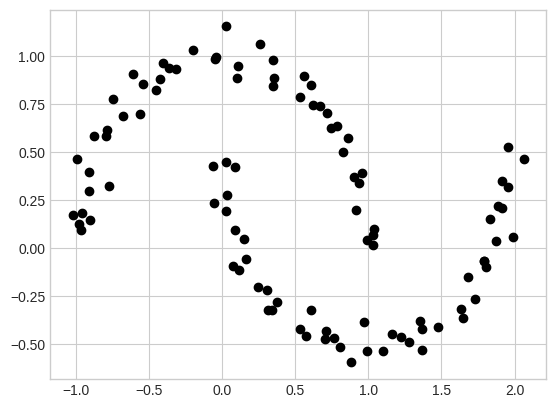

In [ ]:
plt.plot(data[:,0], data[:,1], 'o', color='black');

In [ ]:
q = samples.detach().numpy()

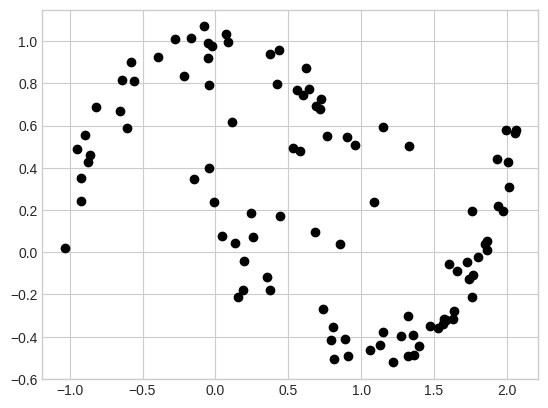

In [ ]:
plt.plot(q[:,0], q[:,1], 'o', color='black');

In [ ]:
log_jac_det.shape

torch.Size([100])

In [ ]:
import pandas as pd

In [ ]:
data, label = make_moons(n_samples=BATCHSIZE, noise=0.05)
label = label.reshape(100, 1)
label = np.concatenate(label)
label

array([0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1])

In [134]:
data, label = make_moons(n_samples=BATCHSIZE, noise=0.05)
label

array([0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [135]:

one_h = pd.get_dummies(label)

In [136]:
one_h

,0,1
0,1,0
1,0,1
2,1,0
3,0,1
4,0,1
...,...,...
95,1,0
96,1,0
97,1,0
98,0,1


In [139]:

one_h = one_h.to_numpy()
bbb = torch.Tensor(one_h)

AttributeError: 'numpy.ndarray' object has no attribute 'to_numpy'

In [140]:
bbb

tensor([[1., 0.],
        [0., 1.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [1., 0.],
        [0., 1.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [1., 0.],
        [0., 1.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [1., 0.],
        [0., 1.],
        [1., 0.],
        [0

In [132]:
label

array([1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0])

In [131]:
label = label.reshape(100, 1)
label = np.concatenate(label)
one_h = pd.get_dummies(label)
one_h = one_h.to_numpy()
bbb = torch.Tensor(one_h)

In [151]:
bb = b.detach().numpy()
bb = np.concatenate (bb)
one_hot_bb = pd.get_dummies(bb)
one_hot_bb = one_hot_bb.to_numpy()
bbb = torch.Tensor(one_hot_bb)

In [153]:
bbb.shape

torch.Size([100, 2])

In [ ]:
cat_z = torch.cat((z, y), dim=1)
cat_z

In [ ]:
0.5*torch.sum(z**2, 1)

In [158]:
qq = torch.cat((samples_1[:,:2], w[:,2:]), dim=1)

In [ ]:
qq

In [164]:
pp = samples_1[:, :2]

In [165]:
p = pp.detach().numpy()

In [ ]:
p

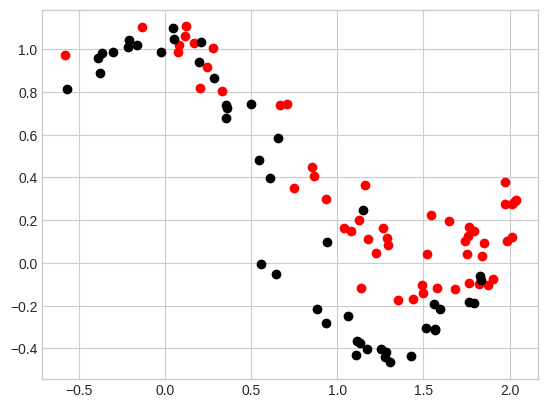

In [163]:

plt.plot(zeros[:,0], zeros[:,1], 'o', color='red');
plt.plot(ones[:,0], ones[:,1], 'o', color='black');

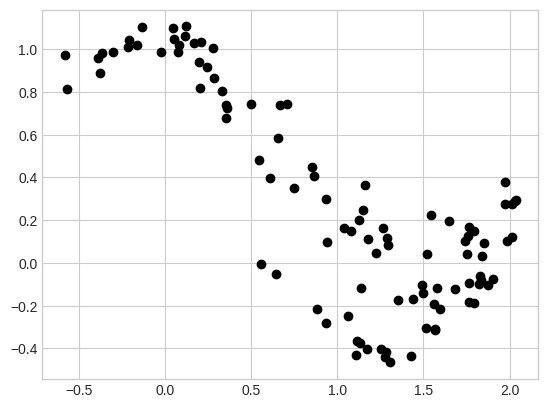

In [166]:
plt.plot(p[:,0], p[:,1], 'o', color='black');

In [111]:
ones.shape

(40, 4)

In [156]:
samples_1, _ = inn(w, rev=True)

In [ ]:
samples_1

In [143]:
a = torch.empty(1, 100).uniform_(0, 1)

In [144]:
b = torch.bernoulli(a)

In [145]:
b

tensor([[0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1.,
         1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1.,
         1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0.,
         1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0.,
         0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
         1., 0., 0., 1., 1., 1., 0., 0., 0., 1.]])

In [154]:
z = torch.randn(BATCHSIZE, 2)

In [ ]:
w = torch.cat((z,bbb), dim=1)
w

In [ ]:
w[:,2:]

In [ ]:
ww = torch.cat((pp, w[:,2:]), dim=1)
ww

In [160]:
qqq = qq.detach().numpy()

In [161]:
zeros = qqq[np.where(qqq[:,2] == 1.)]

In [162]:
ones = qqq[np.where(qqq[:,3] == 1.)]

In [ ]:

x = torch.Tensor(data)
pad_x = torch.zeros(100,2)
x = torch.cat((x,pad_x), dim=1)
x

tensor([[-0.9129,  0.4957,  0.0000,  0.0000],
        [ 1.0458,  0.3993,  0.0000,  0.0000],
        [ 1.1497, -0.4741,  0.0000,  0.0000],
        [ 0.9326, -0.4417,  0.0000,  0.0000],
        [-0.3255,  0.9104,  0.0000,  0.0000],
        [-0.0474,  0.4102,  0.0000,  0.0000],
        [ 0.3740,  1.0048,  0.0000,  0.0000],
        [ 0.8986, -0.4994,  0.0000,  0.0000],
        [ 0.3737,  0.9485,  0.0000,  0.0000],
        [ 1.0545, -0.0075,  0.0000,  0.0000],
        [ 0.5288, -0.4361,  0.0000,  0.0000],
        [ 0.6660,  0.8147,  0.0000,  0.0000],
        [ 0.8144,  0.7123,  0.0000,  0.0000],
        [ 0.2185, -0.0285,  0.0000,  0.0000],
        [ 2.0532,  0.3250,  0.0000,  0.0000],
        [-0.0824,  0.4929,  0.0000,  0.0000],
        [-0.9481,  0.3043,  0.0000,  0.0000],
        [ 0.4956,  0.8541,  0.0000,  0.0000],
        [ 0.9103,  0.5283,  0.0000,  0.0000],
        [ 0.9781,  0.2266,  0.0000,  0.0000],
        [-0.0742,  0.9832,  0.0000,  0.0000],
        [ 0.7932, -0.4515,  0.0000

In [ ]:
from keras.datasets import mnist

In [ ]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
test_X

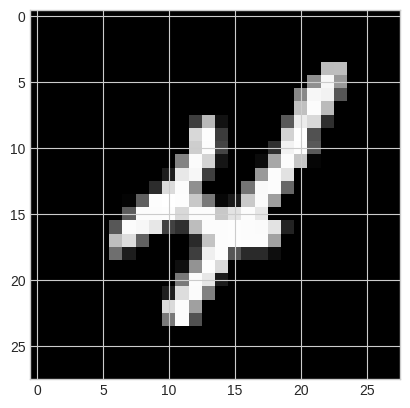

In [ ]:
plt.imshow(train_X[9], cmap=plt.get_cmap('gray'))
plt.show()

In [ ]:
train_y[9]

4